In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [6]:
# build the dataset

block_size = 3
X, Y = [], []
for w in words[:5]:
    print(w)
    context = [0]*block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [9]:
C = torch.randn((27, 2)) # We make 2 features for each dimensions, so basically crush 27 letters into 2 dimensions

In [10]:
C[5]

tensor([1.1124, 1.2765])

In [ ]:
F.one_hot(torch.tensor(5), num_classes = 27).float() @ C # This does not make a difference, so we don't do one hot and just index as above

tensor([1.1124, 1.2765])

In [17]:
C[torch.tensor([5, 6, 7, 7, 7])]

tensor([[ 1.1124,  1.2765],
        [-1.2737, -1.7008],
        [ 0.4841,  1.4567],
        [ 0.4841,  1.4567],
        [ 0.4841,  1.4567]])

In [18]:
C[X].shape

torch.Size([32, 3, 2])

In [22]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [21]:
W1 = torch.randn((6, 100)) # 100 neurons and 6 inputs because 3*2 array
b1 = torch.randn(100) # 100 biases for 100 neurons

In [23]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [31]:
# torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape # This does not generalize if block size changes
torch.cat(torch.unbind(emb, 1), 1).shape # This can be made more efficient

torch.Size([32, 6])

In [32]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
a.view(3, 3, 2) # This function call is extremely efficient

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [35]:
a.storage()

/var/folders/c6/xkd12s657gg9lqp9cmjmx8p80000gn/T/ipykernel_39423/214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [36]:
emb.shape

torch.Size([32, 3, 2])

In [38]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [39]:
# h = emb.view(emb.shape[0], 6) @ W1 + b1
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # alternative

In [41]:
h.shape

torch.Size([32, 100])

In [42]:
W2 = torch.randn((100, 27)) # To predict which of the 27 characters come next
b2 = torch.randn(27)

In [43]:
logits = h@W2 + b2

In [44]:
logits.shape

torch.Size([32, 27])

In [45]:
counts = logits.exp()

In [46]:
prob = counts/counts.sum(1, keepdim=True)

In [47]:
prob.shape

torch.Size([32, 27])

In [49]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(18.0862)

In [50]:
# Combined code

In [137]:
# build the dataset

block_size = 3
X, Y = [], []
for w in words:
    # print(w)
    context = [0]*block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [138]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator = g)
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]


In [130]:
sum(p.nelement() for p in parameters)

3481

In [131]:
# forward pass
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
# counts = logits.exp()
# prob = counts/counts.sum(1, keepdim = True)
# loss = -prob[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Y) # Alternative for the above 3 lines
loss

tensor(19.5052)

In [139]:
for p in parameters:
    p.requires_grad = True

In [133]:
# To grid search for learning rate
# torch.linspace(0.001, 1, 1000) # This is evenly spaced, so we try to space is exponentially as below
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [134]:
# Training code
lri = []
lossi = []
for i in range(1000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix]) 
    print(loss.item())
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    # To guess the learning rate
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    # Track loss stats
    lri.append(lr)
    lossi.append(loss.item())
# print(loss.item())

20.306421279907227
19.293743133544922
18.595399856567383
18.28201675415039
17.94181251525879
20.53018569946289
19.358728408813477
18.987796783447266
20.0386905670166
19.232406616210938
21.15995216369629
19.816072463989258
19.32353401184082
19.18570899963379
16.861886978149414
18.382213592529297
16.71487045288086
16.860889434814453
16.526132583618164
19.81883430480957
21.29705047607422
18.79172706604004
19.26664161682129
20.33188819885254
21.141590118408203
17.4461612701416
16.501293182373047
19.304508209228516
18.35611915588379
21.40331268310547
21.248777389526367
16.26834487915039
18.195043563842773
20.438676834106445
17.651077270507812
19.425273895263672
20.29945945739746
20.587112426757812
18.281230926513672
19.999732971191406
17.88151741027832
18.084779739379883
19.89336395263672
18.056852340698242
19.57111930847168
16.918481826782227
16.9371280670166
15.156170845031738
19.57582664489746
19.391681671142578
15.516593933105469
21.07548713684082
17.148906707763672
19.16022300720215
20

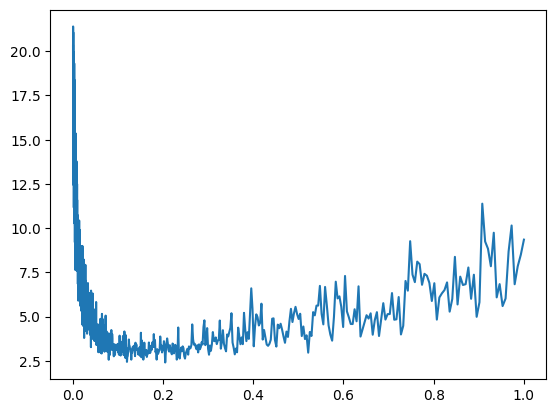

In [135]:
plt.plot(lri,lossi)

In [ ]:
# A good learning rate is where the loss looks stable, so in this case we use 0.1 as the learning rate. So we modify the training code as below

In [156]:
# Training code
for i in range(10000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix]) 
    # print(loss.item())
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    # lr = 0.1
    lr = 0.01 # We do this as training decay, towards the end stage of training, we reduce the learning rate and do a few steps
    for p in parameters:
        p.data += -lr * p.grad

print(loss.item())

2.2069668769836426


In [157]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y) 
loss

tensor(2.3079, grad_fn=<NllLossBackward0>)

In [ ]:
# We split data into train/validation/test in the ration 80/10/10

In [237]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []

    for w in words:
        context = [0]*block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182512, 3]) torch.Size([182512])
torch.Size([22860, 3]) torch.Size([22860])
torch.Size([22774, 3]) torch.Size([22774])


In [238]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator = g)
W1 = torch.randn((30, 200), generator = g)
b1 = torch.randn(200, generator = g)
W2 = torch.randn((200, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]


In [239]:
sum(p.nelement() for p in parameters)

11897

In [240]:
for p in parameters:
    p.requires_grad = True

In [241]:
stepi = []
lri = []
lossi = []

In [242]:
# Training code
for i in range(200000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # Forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix]) 
    # print(loss.item())

    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    # lr = 0.1
    # lr = 0.05
    # lr = 0.01 # We do this as training decay, towards the end stage of training, we reduce the learning rate and do a few steps
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    stepi.append(i)
    lossi.append(loss.log10().item())

print(loss.item())

1.9096283912658691


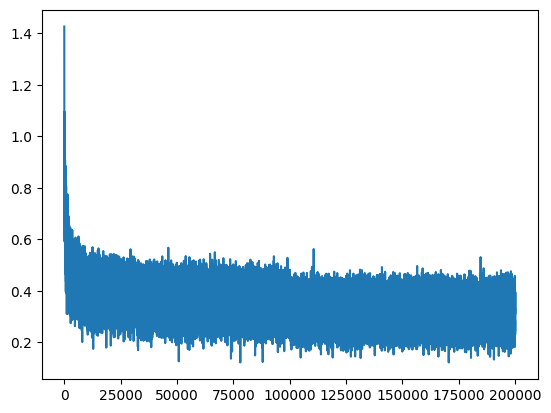

In [243]:
plt.plot(stepi, lossi)

In [244]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr) 
loss

tensor(2.1257, grad_fn=<NllLossBackward0>)

In [245]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev) 
loss

tensor(2.1626, grad_fn=<NllLossBackward0>)

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s = 200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i, 1].item(), itos[i], ha = "center", va = "center", color = 'white')
plt.grid('minor')